<a href="https://colab.research.google.com/github/infinityrun/EIP-PHASE-1/blob/master/Prog-2/EIP4_ASSIGNMENT_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


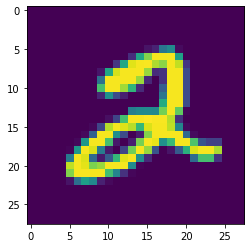

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[5])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1) , use_bias="false")) #26
model.add(BatchNormalization())
#model.add(Dropout(0.10))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias="false")) #24
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2))) #12
model.add(BatchNormalization())

model.add(Dropout(0.05))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias="false")) #10
model.add(BatchNormalization())
#model.add(Dropout(0.20))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias="false")) #8
model.add(BatchNormalization())

#model.add(Dropout(0.20))

model.add(MaxPooling2D(pool_size=(2, 2))) #4
model.add(BatchNormalization())

model.add(Dropout(0.20))

model.add(Convolution2D(16, 3, 3, activation='relu', use_bias="false")) #2
model.add(BatchNormalization())
#model.add(Dropout(0.25))

model.add(Convolution2D(10, 2, 2)) #1

model.add(Flatten())
model.add(Activation('softmax'))


model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1..., use_bias="false")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias="false")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias="false")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias="false")`


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 12, 12, 16)        64        
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 16)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias="false")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (2, 2))`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.0019 * 1/(1 + 0.316 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0019), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=128, epochs=16, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Train on 60000 samples, validate on 10000 samples
Epoch 1/16

Epoch 00001: LearningRateScheduler setting learning rate to 0.0019.
60000/60000 [==============================] - 13s 213us/step - loss: 0.0327 - acc: 0.9896 - val_loss: 0.0313 - val_acc: 0.9903
Epoch 2/16

Epoch 00002: LearningRateScheduler setting learning rate to 0.001443769.
60000/60000 [==============================] - 10s 173us/step - loss: 0.0250 - acc: 0.9918 - val_loss: 0.0302 - val_acc: 0.9901
Epoch 3/16

Epoch 00003: LearningRateScheduler setting learning rate to 0.0011642157.
60000/60000 [==============================] - 10s 173us/step - loss: 0.0225 - acc: 0.9927 - val_loss: 0.0284 - val_acc: 0.9902
Epoch 4/16

Epoch 00004: LearningRateScheduler setting learning rate to 0.0009753593.
60000/60000 [==============================] - 10s 173us/step - loss: 0.0205 - acc: 0.9933 - val_loss: 0.0210 - val_acc: 0.9935
Epoch 5/16

Epoch 00005: LearningRateScheduler setting learning rate to 0.0008392226.
60000/60000 [==

In [0]:

score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.01956415104058797, 0.9942]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.2981861e-09 2.6044134e-09 2.9623985e-09 1.7849432e-07 6.6858843e-09
  5.2506016e-10 3.3237904e-13 9.9999964e-01 2.1495224e-10 1.4030022e-07]
 [1.2202904e-08 1.3018936e-09 1.0000000e+00 3.4190688e-11 3.0420739e-11
  9.9583265e-14 2.8353544e-09 1.6230971e-09 4.1635057e-11 9.9108222e-14]
 [5.5816085e-09 9.9999917e-01 2.0958757e-09 1.1655014e-08 1.8903934e-07
  8.2279312e-09 4.8868628e-08 5.4669783e-07 1.6248961e-08 3.2986465e-09]
 [9.9998987e-01 2.8881816e-10 4.9809370e-09 8.5260443e-10 3.4623354e-10
  1.3025990e-08 9.9398767e-06 4.0167376e-11 1.6972876e-07 9.0863939e-09]
 [2.1658342e-11 1.9427941e-10 5.5984283e-11 6.7245494e-11 9.9999928e-01
  1.8884022e-13 2.5483682e-10 1.0609629e-07 2.4356399e-09 5.4128128e-07]
 [2.3247260e-09 9.9999976e-01 6.5096739e-10 1.6975024e-10 6.6800887e-08
  2.7338801e-11 3.7112946e-10 2.1329528e-07 2.0646380e-10 1.5159369e-09]
 [5.9482265e-14 1.1110113e-07 3.0489489e-09 9.3502777e-13 9.9999630e-01
  8.5658182e-11 2.7357940e-12 5.2493402e-07 1.7048379e-08 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

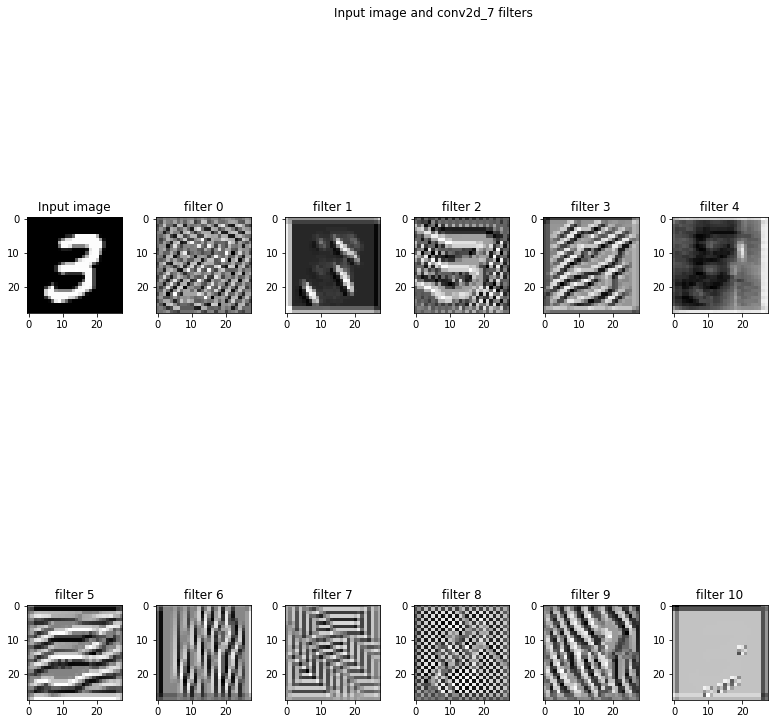

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[7]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_7'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()